<h1 align= 'center'> Image to Pencil Sketch (OpenCV) </h1>

## 0. Import relevant Dependencies

Incase you are getting any error saying the package is not installed while running the below cell, then you can use two methods:
- pip install ________.
- google 'How to install ________'.

In [1]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline

# Import OpenCV
import cv2

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Image to Pencil Sketch with Python (Procedure)

- Obtain the Image and read the Image in RBG format.
- Convert it to a GrayScale Image.
- Invert the GrayScale Image.
- Blur the Inverted GrayScale Image.
- Create the Pencil Sketch by mixing the GrayScale Image with the Inverted Blurry Image.

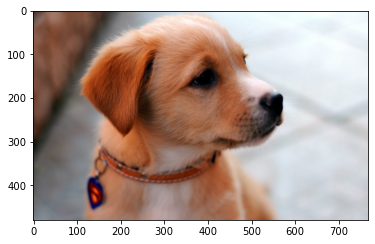

In [2]:
## Original Image
image = cv2.imread('dog.jpg')
color_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)        ## Converting to RGB format

plt.imshow(color_image)
plt.show()

#####################################
## ***OR***
### cv2.imshow(color_image)
### cv2.waitKey(0)
#####################################

### Step 1: Convert the Color Image to Grayscale

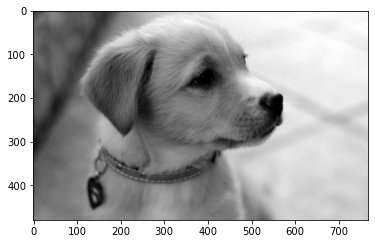

In [3]:
## Convert to Gray Image
gray_image = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY) 

plt.imshow(gray_image, cmap='gray')
plt.show()

### Step 2: Obtain a Negative

A negative of the image can be obtained by "**inverting**" the GrayScale Value of every Pixel. Since by default GrayScale Values are represented as integers in the range [0,255], the "**inverse**" of a GrayScale Value *x* is simply ***255-x***.

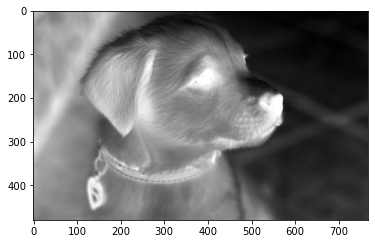

In [4]:
## Invert Gray Image
invert_gray = 255 - gray_image

plt.imshow(invert_gray, cmap='gray')
plt.show()

### Step 3: Apply a Gaussian Blur

A **Gaussian Blur** is an effective way to both reduce noise and reduce the amount of detail in an Image (also called smoothing an image. Mathematically it is equivalent to convolving an image with a Gaussian Kernel. The size of the Gaussian kernel can be passed as an optional argument *ksize*. It should be a pair of odd numbers (eg. (25,25), (21,21)). Larger the kernel size, more blurred the image will be and it will lose its subtle features.

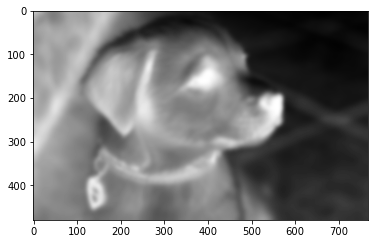

In [27]:
## Blur the Inverted Image
blurred = cv2.GaussianBlur(invert_gray, ksize= (25,25), sigmaX=0, sigmaY=0) 
### If both sigmaX and sigmaY are set to zero, the width of the Gaussian Kernel will be derived from ksize

plt.imshow(blurred, cmap='gray')
plt.show()

### Step 4: Blend the Grayscale Image with the Blurred Negative

This is essentiallyd *dividing* the GrayScale (or channel) Value of an Image Pixel by the Inverted Image Pixel Value, while making sure that the resulting Pixel Value will be in the range [0,255], and that we do not divide by zero.

- ***cv2.divide*** automatically takes care of the division by zero, making the result 0 where *255 - Inverted Image* is zero.

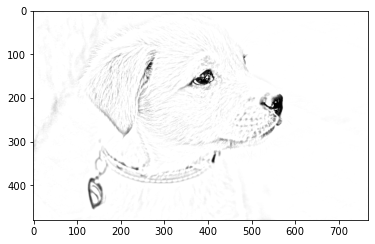

In [28]:
## Convert to Pencil Sketch
inverted_blurred = 255 - blurred
pencil_sketch = cv2.divide(gray_image, inverted_blurred, scale= 255.0)

plt.imshow(pencil_sketch, cmap='gray')
plt.show()